<a href="https://colab.research.google.com/github/AlaricAI/Portfolio/blob/main/2_amaliyot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

location       district  rooms  \
0  город Ташкент, Юнусабадский район, Юнусабад 8-...   Юнусабадский      3   
1  город Ташкент, Яккасарайский район, 1-й тупик ...  Яккасарайский      2   
2  город Ташкент, Чиланзарский район, Чиланзар 2-...   Чиланзарский      2   
3  город Ташкент, Чиланзарский район, Чиланзар 9-...   Чиланзарский      3   
4  город Ташкент, Чиланзарский район, площадь Актепа   Чиланзарский      3   

  size  level  max_levels  price  
0   57      4           4  52000  
1   52      4           5  56000  
2   42      4           4  37000  
3   65      1           4  49500  
4   70      3           5  55000

# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

In [ ]:
df.head()

location       district  rooms  \
0  город Ташкент, Юнусабадский район, Юнусабад 8-...   Юнусабадский      3   
1  город Ташкент, Яккасарайский район, 1-й тупик ...  Яккасарайский      2   
2  город Ташкент, Чиланзарский район, Чиланзар 2-...   Чиланзарский      2   
3  город Ташкент, Чиланзарский район, Чиланзар 9-...   Чиланзарский      3   
4  город Ташкент, Чиланзарский район, площадь Актепа   Чиланзарский      3   

  size  level  max_levels  price  
0   57      4           4  52000  
1   52      4           5  56000  
2   42      4           4  37000  
3   65      1           4  49500  
4   70      3           5  55000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [ ]:
df[df['size'] == 'Площадьземли:1сот']

location     district  rooms  \
5347  город Ташкент, Яшнободский район, Дархон  Яшнободский      4   

                   size  level  max_levels   price  
5347  Площадьземли:1сот      3           5  150000

In [ ]:
df = df.drop(index = 5347)

In [ ]:
df['size'] = df['size'].astype('float64')

In [ ]:
df['size'] = df['size'].astype('int64')

In [ ]:
df[df['price'] == 'Договорная']

location           district  \
202        город Ташкент, Яккасарайский район, Баходыра      Яккасарайский   
411        город Ташкент, Яккасарайский район, Баходыра      Яккасарайский   
439   город Ташкент, Мирзо-Улугбекский район, улица ...  Мирзо-Улугбекский   
460   город Ташкент, Чиланзарский район, Чиланзар 1-...       Чиланзарский   
507   город Ташкент, Яшнободский район, 1-й проезд А...        Яшнободский   
...                                                 ...                ...   
7039  город Ташкент, Яшнободский район, Городок Авиа...        Яшнободский   
7196     город Ташкент, Чиланзарский район, Чиланзар-16       Чиланзарский   
7323  город Ташкент, Мирзо-Улугбекский район, жилой ...  Мирзо-Улугбекский   
7403  город Ташкент, Учтепинский район, Чиланзар 14-...        Учтепинский   
7404  город Ташкент, Учтепинский район, Чиланзар 14-...        Учтепинский   

      rooms  size  level  max_levels       price  
202       3   119      3           9  Договорная  
411       4   160      4           9  Договорная  
439       3   105      5           6  Договорная  
460       3    90      6           8  Договорная  
507       2    48      4           4  Договорная  
...     ...   ...    ...         ...         ...  
7039      1    38      3           8  Договорная  
7196      2    51      3           4  Договорная  
7323      6   208      1           7  Договорная  
7403      2    35      2           9  Договорная  
7404      2    35      2           9  Договорная  

[99 rows x 7 columns]

In [ ]:
df = df[df['price'] != 'Договорная']

In [ ]:
df['price'] = df['price'].astype('int64')

<ipython-input-124-2557eed608a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].astype('int64')


In [ ]:
df1 = df.drop(['location','district'], axis=1)

In [ ]:
df1.corr()['price']

rooms         0.056161
size          0.001107
level        -0.003449
max_levels    0.011175
price         1.000000
Name: price, dtype: float64

In [ ]:
df['district'].unique()

array(['Юнусабадский', 'Яккасарайский', 'Чиланзарский', 'Учтепинский',
       'Мирзо-Улугбекский', 'Яшнободский', 'Мирабадский',
       'Шайхантахурский', 'Олмазорский', 'Сергелийский', 'Янгихаётский',
       'Бектемирский'], dtype=object)

In [ ]:
df = df.drop('location', axis=1)

In [ ]:
# prompt: pricega ustunlar korilatsiyasi juda past shunga menga korilatsiyani yanadakuchaytiradigan ko'd ber menda rooms size level max_levels lar bor hammasi korilatsiyasi 0.05 lar atrofida

# Yangi xususiyatlar yaratib ko'ramiz
df['size_per_room'] = df['size'] / df['rooms']
df['level_ratio'] = df['level'] / df['max_levels']

# Korrelyatsiyani qayta hisoblaymiz
df1.corr()['price']


rooms         0.056161
size          0.001107
level        -0.003449
max_levels    0.011175
price         1.000000
Name: price, dtype: float64

In [ ]:
# prompt: district ustuniga raqamlardan ibora va o'zaro aloqasi bo'lgan qiymatlar ber

# Tumanlar uchun raqamli qiymatlar berish
district_mapping = {
    'Чиланзарский': 1,
    'Мирзо-Улугбекский': 2,
    'Сергелийский': 3,
    'Яккасарайский': 4,
    'Юнусабадский': 5,
    'Мирабадский': 6,
    'Шайхантахурский': 7,
    'Алмазарский': 8,
    'Учтепинский': 9,
    'Яшнободский': 10,
    'Бектемирский': 11,
    'Олмазорский': 12,
    'Янгихаётский': 13
}

df['district_code'] = df['district'].map(district_mapping)

# Yangi ustun yaratish va tuman nomlari o'rniga raqamli qiymatlarni joylashtirish
df['district_code'] = df['district'].map(district_mapping)
df.head()

# Korrelyatsiya hisoblash
df1 = df.drop(['district'], axis=1)
df1.corr()['price']



rooms            0.056161
size             0.001107
level           -0.003449
max_levels       0.011175
price            1.000000
size_per_room   -0.000555
level_ratio     -0.017832
district_code    0.020691
Name: price, dtype: float64

In [ ]:
df = df.drop('district', axis=1)
df.head()

rooms  size  level  max_levels  price  size_per_room  level_ratio  \
0      3    57      4           4  52000      19.000000         1.00   
1      2    52      4           5  56000      26.000000         0.80   
2      2    42      4           4  37000      21.000000         1.00   
3      3    65      1           4  49500      21.666667         0.25   
4      3    70      3           5  55000      23.333333         0.60   

   district_code  
0              5  
1              4  
2              1  
3              1  
4              1

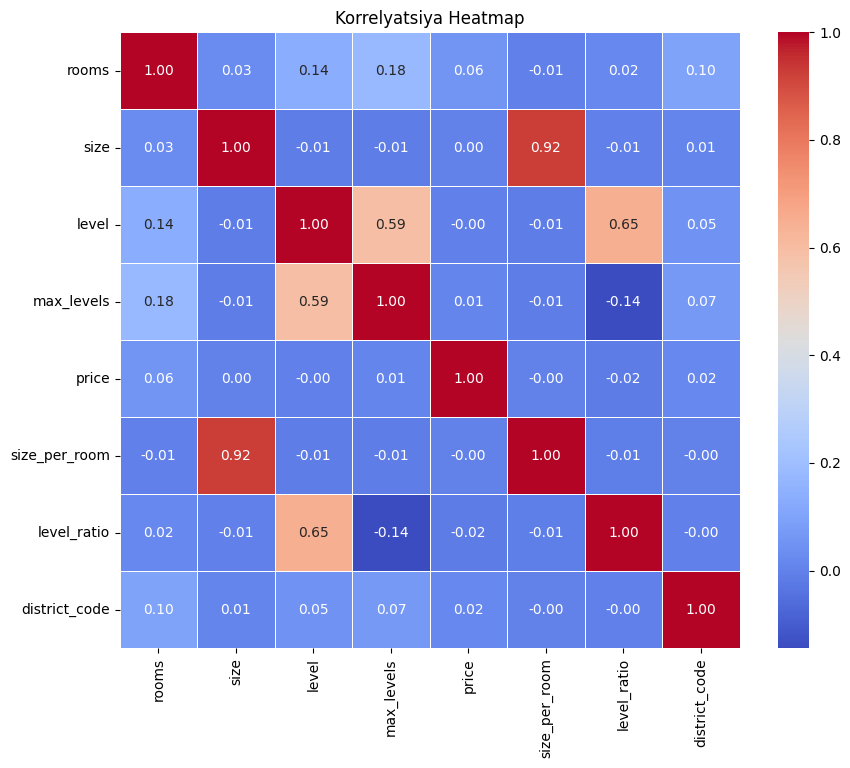

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))  # Grafik o‘lchamini belgilash
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Korrelyatsiya Heatmap")
plt.show()


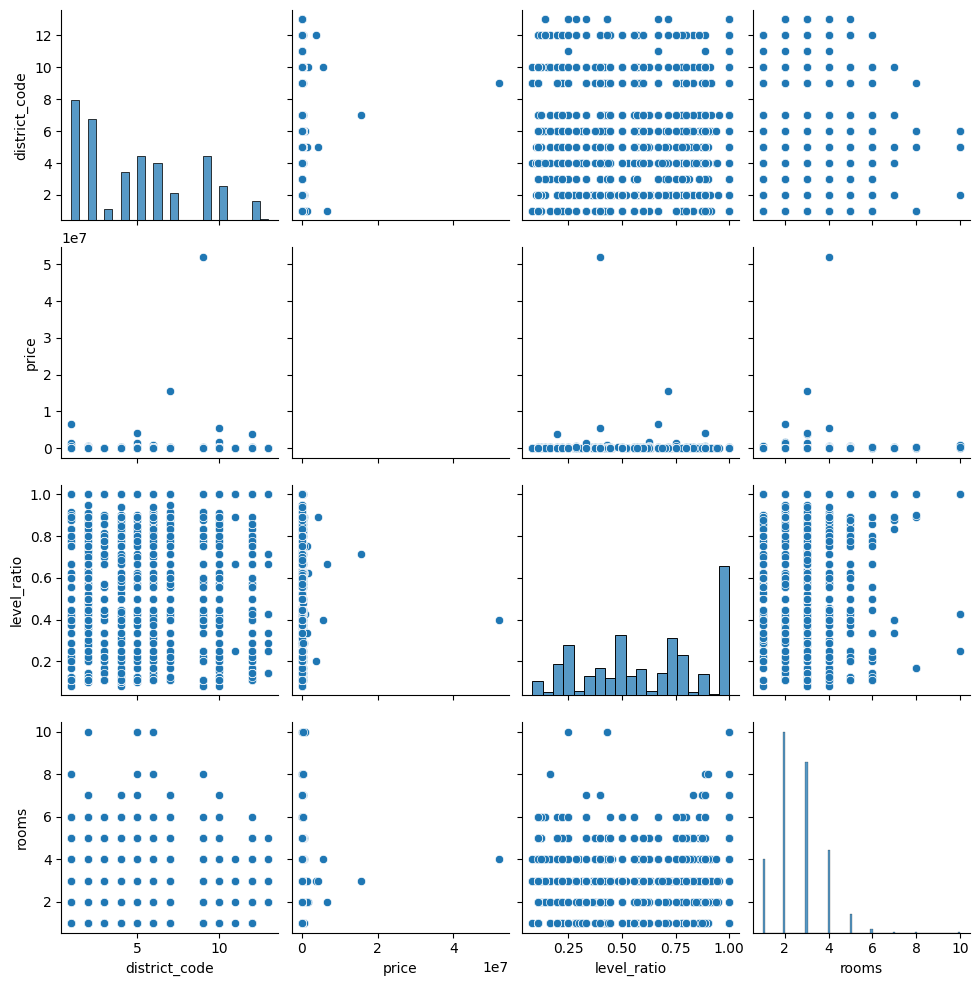

In [ ]:
sns.pairplot(df[['district_code', 'price', 'level_ratio', 'rooms']])
plt.show()


In [ ]:
df.head()

rooms  size  level  max_levels  price  size_per_room  level_ratio  \
0      3    57      4           4  52000      19.000000         1.00   
1      2    52      4           5  56000      26.000000         0.80   
2      2    42      4           4  37000      21.000000         1.00   
3      3    65      1           4  49500      21.666667         0.25   
4      3    70      3           5  55000      23.333333         0.60   

   district_code  
0              5  
1              4  
2              1  
3              1  
4              1

In [ ]:
import matplotlib.pyplot as plt
df['level_size'] = df['level'] * df['size']
df['level_rooms'] = df['level'] * df['rooms']
df1.corr()['price']

rooms            0.056161
size             0.001107
level           -0.003449
max_levels       0.011175
price            1.000000
size_per_room   -0.000555
level_ratio     -0.017832
district_code    0.020691
Name: price, dtype: float64

In [ ]:
df.head()

rooms  size  level  max_levels  price  size_per_room  level_ratio  \
0      3    57      4           4  52000      19.000000         1.00   
1      2    52      4           5  56000      26.000000         0.80   
2      2    42      4           4  37000      21.000000         1.00   
3      3    65      1           4  49500      21.666667         0.25   
4      3    70      3           5  55000      23.333333         0.60   

   district_code  level_size  level_rooms  
0              5         228           12  
1              4         208            8  
2              1         168            8  
3              1          65            3  
4              1         210            9

In [ ]:
df.corr()['price']

rooms            0.056161
size             0.001107
level           -0.003449
max_levels       0.011175
price            1.000000
size_per_room   -0.000555
level_ratio     -0.017832
district_code    0.020691
level_size       0.001657
level_rooms      0.020685
Name: price, dtype: float64

In [ ]:
district_avg_size = df.groupby('district_code')['size'].transform('mean')
df['district_size_avg'] = district_avg_size

In [ ]:
df['level_rooms_ratio'] = df['level_rooms'] / df['size_per_room']

In [ ]:
df.corr()['price']

rooms                0.056161
size                 0.001107
level               -0.003449
max_levels           0.011175
price                1.000000
size_per_room       -0.000555
level_ratio         -0.017832
district_code        0.020691
level_size           0.001657
level_rooms          0.020685
district_size_avg   -0.003993
level_rooms_ratio    0.002139
Name: price, dtype: float64